In [183]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import seaborn as sns 

In [184]:
#!pip install seaborn
# !pip install plotly 

## Load the dataset 

In [185]:
df = pd.read_csv('googleplaystore.csv')

In [186]:
test_load_dataset(df)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Clean Dataset

In [187]:
df.drop_duplicates(inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Clean Reviews, Installs, and Price:

In [188]:
special_char = ['+','$',',','']
col_to_clean = ['Reviews','Installs', 'Price']
for col in col_to_clean:
    for char in special_char:
        df[col] = df[col].apply(lambda x: x.replace(char,''))
 
# df[df.Type == 'Paid']

In [189]:
line = df[df.Installs == 'Free']

In [190]:
df.drop(10472, axis = 0, inplace = True)

In [191]:
df.Installs = df.Installs.astype(int)

## Clean Reviews

In [192]:
df.Reviews = df.Reviews.astype(int)

## Clean Size 

In [193]:
df_m = df[df.Size.str.contains('k',regex=False)]
df_m.Size = df_m.Size.str.replace('k','').astype(float)
df_m.Size = df_m.Size/1024

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
df.Size.update(df_m.Size)

In [195]:
df.Size = df.Size.str.replace('M','')

In [196]:
df.Size = df.Size.replace('Varies with device', np.nan)
df.Size = df.Size.astype(float)

In [197]:
asa = df.groupby('Category').mean()

In [198]:
df['Size'] = df.groupby('Category')['Size'].transform(lambda x: x.fillna(np.mean(x)))

## Clean Rating:

In [199]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [200]:
df['Content Rating'].replace(['Everyone 10+','Mature 17+','Adults only 18+'],['10+','Mature','Adults'], inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


## Data Analysis
### Market size

<AxesSubplot:xlabel='Type', ylabel='count'>

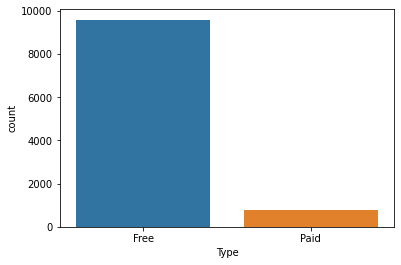

In [202]:
### Free and paid
sns.countplot(data = df, x='Type')

In [203]:
### Free and paid 
px.pie(df.groupby('Type').count(), values = 'App', names = ['Free','Paid'])

In [204]:
total_downloads = df.Installs.sum()/1000000000
print("Market size is:", round(total_downloads,2),"BN downloads.")

Market size is: 146.63 BN downloads.


## Depending on each category, what is the ratio of downloads per app?

In [205]:
top_downloads = df.groupby('Category').Installs.sum().sort_values(ascending = False)
px.bar(y = top_downloads.values, x = top_downloads.index)

In [206]:
# free_apps = df[df.Type == 'Free']
# paid_apps = df[df.Type == 'Paid']
# total_value = paid_apps.Price * paid_apps.Installs
# paid_apps['total_value'] = total_value
# px.pie(paid_apps, values = 'total_value', names = 'Category')

## App with the largest number of installs:

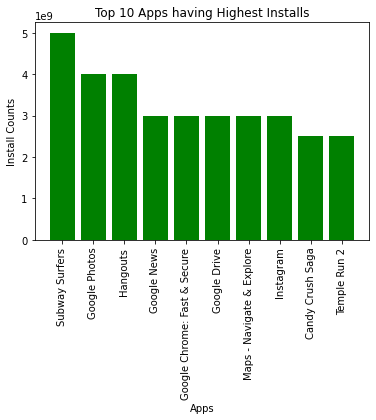

In [207]:
res = df.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)
plt.bar("App", "Installs", data = final_result, color = "Green")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

## What is the market share per category, in percentage?

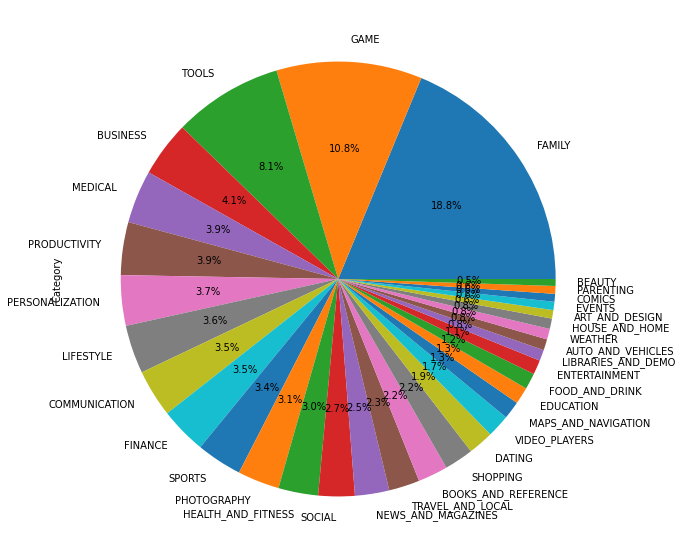

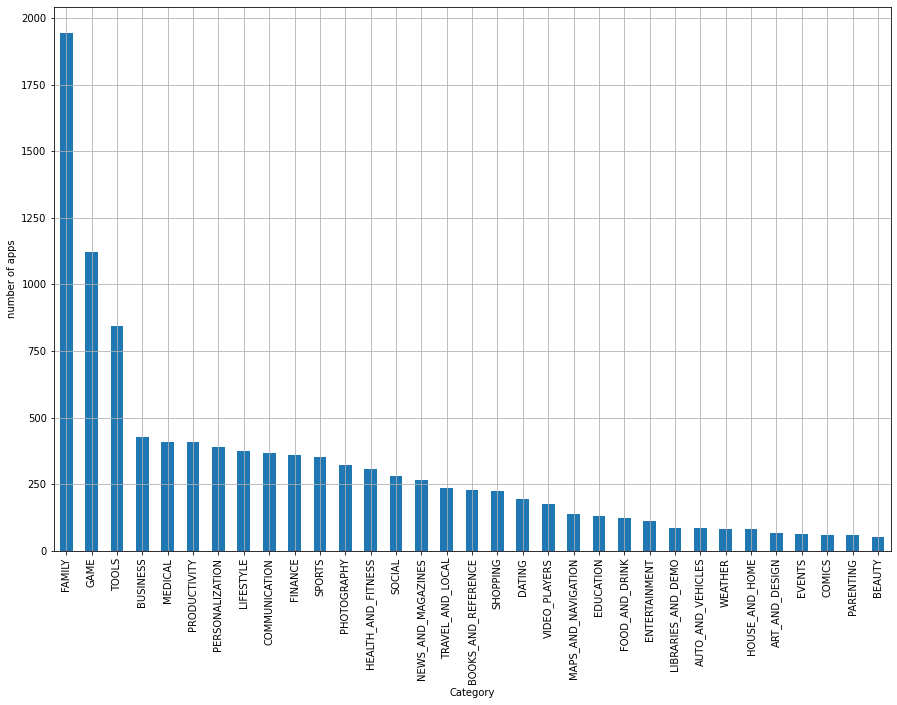

In [208]:
plt.figure(figsize=(15,10))
df['Category'].value_counts('Installs').plot(kind='pie', autopct='%1.1f%%')
plt.figure(figsize=(15,10))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('number of apps')
plt.grid()
plt.show()

## Most Expensive 10 Apps(USD):

In [209]:
most_expensive = df.groupby('Category').Price.max().sort_values(ascending = True)
px.bar(x = most_expensive.values[10:], y = most_expensive.index[10:])

## Top 10 Expensive Apps in Family Category:

In [210]:
paid_apps = df[df.Type == 'Paid']
paid_apps[paid_apps.Category == 'FAMILY'].sort_values(by = ['Price'], ascending = False)[0:10][['App','Price','Installs']]

,App,Price,Installs
8721,DRAGON QUEST III,9.99,10000
6205,Baldur's Gate II,9.99,50000
5475,500 AP World History Questions,9.99,100
10006,XCOM®: Enemy Within,9.99,100000
6180,Baldur's Gate: Enhanced Edition,9.99,100000
8733,CHRONO TRIGGER (Upgrade Ver.),9.99,100000
4694,FINAL FANTASY V,7.99,100000
2168,Children Educational Game Full,7.49,1000
2241,Minecraft,6.99,10000000
4347,Minecraft,6.99,10000000


In [211]:
#The name of the most expensive app is most expensive app, with the price ~400 USD

## Average App Size:

In [212]:
px.box(df.Size, labels={'y':'MB'})

In [213]:
downloands = df.groupby('Type').sum()
downloands

,Rating,Reviews,Size,Installs
Type,,,,
Free,34626.3,4194850131,207388.545863,146562688646
Paid,2612.3,9103921,15706.544121,69225881


## Distribution of paid and unpaid applications rating:

Average Rating: 4.187876743139902


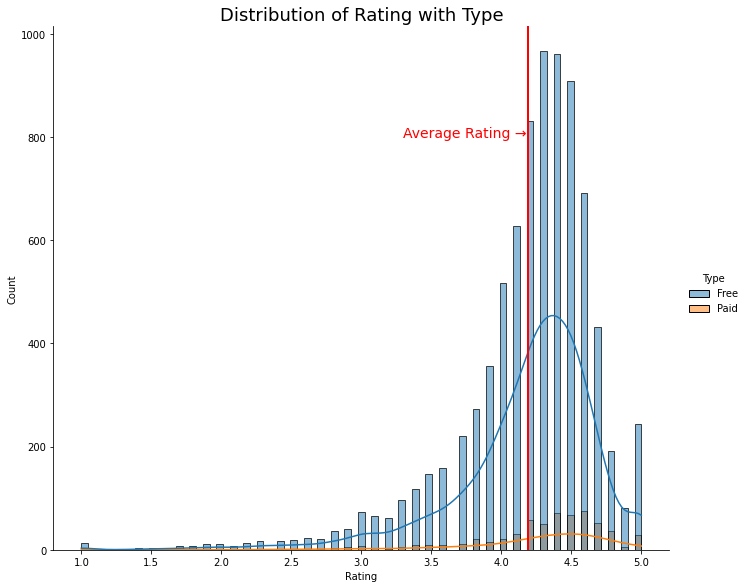

In [214]:
avg_rating = df.Rating.mean()
print("Average Rating: {}".format(avg_rating))
sns.displot(data=df, x='Rating', kde=True, hue='Type', height=8, aspect=1.2)
plt.axvline(avg_rating, color = 'red', linewidth = 2.0)
plt.text(3.3, 800, 'Average Rating →', color = 'red', fontsize=14)
plt.title('Distribution of Rating with Type', fontsize=18)
plt.show()

## Correlation Matrix:

<AxesSubplot:>

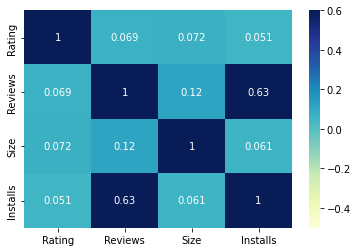

In [215]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",
vmin = -.5 , vmax = 0.6,annot = True)

In [216]:
px.scatter(df, x = np.log(df.Installs), y = np.log(df.Reviews), labels = {'x' : 'Installs', 'y' : 'Reviews'})

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



In [217]:
# As you can see there is a direct correlation between ‘Reviews’ and ‘Installs’.

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



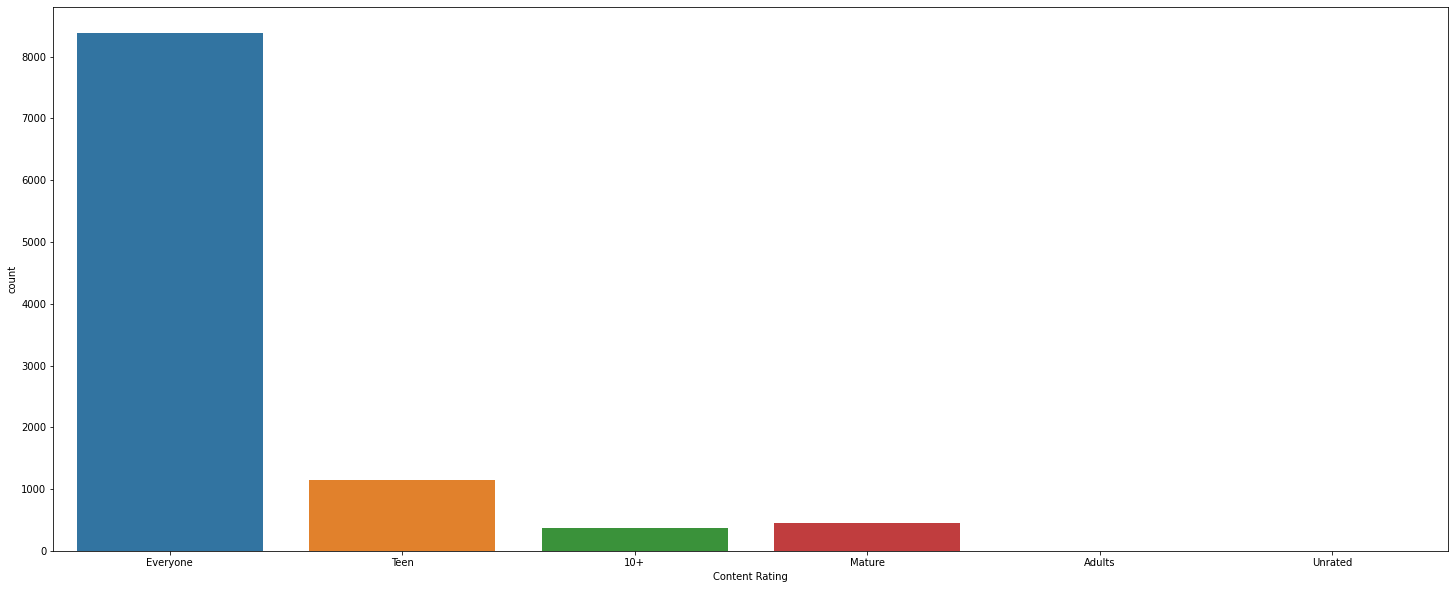

In [218]:
fig,(ax)=plt.subplots(1,1,figsize=(25,10))
sns.countplot('Content Rating',data=df,ax=ax)
plt.show()

## Conclusion

The android market is valued at only 3,67 BN USD which is only 7.4% of the market, this shows the market has the potential to grow with the right price range up to 10 USD. Family, Game, and Tools are highly competitive categories than other ones. But with the right app in these categories with Everyone's content rating can accelerate to reach Break-Even Point and shorten the Payback Period. The developers should keep in mind the preferable size of the app will be between 10–20 MB. The marketing team should work on increasing the Rating of the users' Reviews, which will directly increase the number of downloads.

In [219]:
def load_dataset(dataset):
    pass
def print_summarize_dataset(dataset):
    pass
def clean_dataset(dataset):
    pass
def print_histograms(dataset):
    pass
def compute_correlations_matrix(dataset):
    pass
def print_scatter_matrix():
    pass

In [220]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v3.2.1-c2fe00c (production)
Loading parameters:  OK
User ashirov_a connection: OK


<MY_MOBAPP_STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MOBAPP STUDIO 

 Status             SUCCESS          
 Execution Runtime  3.636028         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PRIN

In [221]:
####